In [1]:
%pip install ucimlrepo



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc,RocCurveDisplay

# Laden der Daten

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [8]:

# variable information 
print(bank_marketing.variables) 

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

## Datenverteilung & Klassifikationsmetriken

Von den insgesamt 45.211 Kunden im Datensatz wurden 39.922 **nicht** akquiriert, während nur 5.289 Kunden erfolgreich akquiriert wurden.  
Das entspricht einem Verhältnis von ca. **88,3 % zu 11,7 %** – der Datensatz ist also deutlich **unausgeglichen (imbalanced)**.

Aus diesem Grund sind **Precision** und **Recall** besonders geeignete Metriken zur Bewertung des Modells:

- **Precision** = TP / (TP + FP): Wie viele der als positiv klassifizierten Fälle waren tatsächlich positiv?
- **Recall** = TP / (TP + FN): Wie viele der tatsächlich positiven Fälle wurden korrekt erkannt?

Wenn mit der Akquise Kosten verbunden sind – beispielsweise durch Telefonanrufe – könnte man den optimalen Schwellenwert auch auf Basis eines **theoretischen Return on Investment (ROI)** berechnen.

Falls eine einzelne Metrik gewünscht ist, bietet sich der **F1-Score** an – insbesondere unter der Annahme, dass **Precision und Recall gleich wichtig** sind.

<Axes: xlabel='y'>

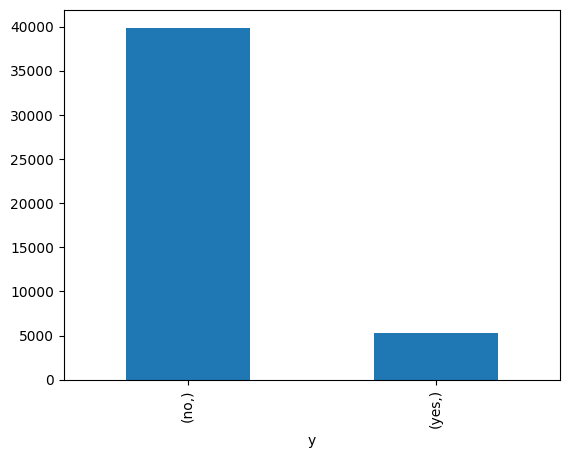

In [9]:
y.value_counts().plot(kind="bar")

In [10]:
y.value_counts() / y.shape[0]

y  
no     0.883015
yes    0.116985
Name: count, dtype: float64

In [11]:
# describe numerical variables 
numerical = ["age", "balance", "duration", "pdays", "campaign"]
X[numerical].describe()

,age,balance,duration,pdays,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,40.197828,2.763841
std,10.618762,3044.765829,257.527812,100.128746,3.098021
min,18.000000,-8019.000000,0.000000,-1.000000,1.000000
25%,33.000000,72.000000,103.000000,-1.000000,1.000000
50%,39.000000,448.000000,180.000000,-1.000000,2.000000
75%,48.000000,1428.000000,319.000000,-1.000000,3.000000
max,95.000000,102127.000000,4918.000000,871.000000,63.000000


In [12]:
X[y["y"]=="yes"][numerical].describe()

,age,balance,duration,pdays,campaign
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,68.702968,2.141047
std,13.497781,3501.104777,392.525262,118.822266,1.921826
min,18.000000,-3058.000000,8.000000,-1.000000,1.000000
25%,31.000000,210.000000,244.000000,-1.000000,1.000000
50%,38.000000,733.000000,426.000000,-1.000000,2.000000
75%,50.000000,2159.000000,725.000000,98.000000,3.000000
max,95.000000,81204.000000,3881.000000,854.000000,32.000000


In [13]:
X[y["y"] !="yes"][numerical].describe()

,age,balance,duration,pdays,campaign
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000
mean,40.838986,1303.714969,221.182806,36.421372,2.846350
std,10.172662,2974.195473,207.383237,96.757135,3.212767
min,18.000000,-8019.000000,0.000000,-1.000000,1.000000
25%,33.000000,58.000000,95.000000,-1.000000,1.000000
50%,39.000000,417.000000,164.000000,-1.000000,2.000000
75%,48.000000,1345.000000,279.000000,-1.000000,3.000000
max,95.000000,102127.000000,4918.000000,871.000000,63.000000


## Einfluss numerischer Variablen

- Die **Dauer des letzten Kontakts** (Variable `duration`) scheint einen starken Einfluss auf die Abschlusswahrscheinlichkeit zu haben.  
  Allerdings ist diese Variable **zum Vorhersagezeitpunkt nicht bekannt**, da sie sich auf das Ergebnis des letzten Kontakts bezieht.  
  Sie sollte daher **aus dem Modell ausgeschlossen** werden, um eine realistische Vorhersage zu ermöglichen.

- Kunden mit einer **höheren Kontobalance (`balance`)** scheinen tendenziell eher ein Produkt abzuschließen als Kunden mit niedriger Balance.

- Auch **Bestandskunden**, die bereits in früheren Kampagnen kontaktiert wurden (`pdays`, `previous`), zeigen eine höhere Abschlusswahrscheinlichkeit.  
  Dies deutet darauf hin, dass **Kundenerfahrung mit der Bank ein relevanter Prädiktor** sein könnte.


## Einfluss binärer Variablen

- Kunden, die einen **bestehenden Kredit** haben (Variables `loan`, `housing`), scheinen **weniger geneigt zu sein**, ein weiteres Produkt abzuschließen.  
  Dies könnte darauf hindeuten, dass finanzielle Vorbelastung ein negativer Prädiktor für den Abschluss ist.


In [14]:
# Binäre Variablen
binary_columns = ["default", "housing", "loan"]
X[y["y"] =="yes"][binary_columns].eq('yes').mul(1).describe()

,default,housing,loan
count,5289.000000,5289.000000,5289.000000
mean,0.009832,0.365854,0.091511
std,0.098676,0.481714,0.288361
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [15]:
# Binäre Variablen
binary_columns = ["default", "housing", "loan"]
X[y["y"] !="yes"][binary_columns].eq('yes').mul(1).describe()

,default,housing,loan
count,39922.000000,39922.000000,39922.000000
mean,0.019112,0.581008,0.169330
std,0.136921,0.493400,0.375048
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


## Einfluss kategorialer Variablen

Zur ersten Einschätzung wurde die **Häufigkeit bzw. Abschlusswahrscheinlichkeit** innerhalb der jeweiligen Kategorien analysiert.  
Eine weiterführende Analyse – beispielsweise mithilfe einer **logistischen Regression** – kann den Einfluss dieser Variablen genauer quantifizieren.

- Kunden, die in einer **vorherigen Kampagne bereits ein Produkt abgeschlossen** haben (`poutcome = success`), schließen **mit sehr hoher Wahrscheinlichkeit erneut ab**.

- **Singles** haben eine höhere Abschlussrate als **verheiratete** Personen.

- Die Variablen **Beruf** (`job`) und **Bildung** (`education`) zeigen deutliche Unterschiede:  
  **Studenten** und **Manager** schließen überdurchschnittlich häufig ab, während **blue-collar-Arbeiter** deutlich seltener zum Abschluss kommen.

- Die Spalte `day_of_week` ist **falsch benannt**:  
  Sie enthält **numerische Werte von 1 bis 31**, was auf den **Tag des Monats (`day_of_month`)** hinweist – **nicht** auf den Wochentag.  
  Eine **Umbenennung oder Korrektur der Spalte** ist hier sinnvoll.

- Bei der Variable `month` fällt auf:  
  **März und April** zeigen eine **erhöhte Abschlussrate**, wobei im März gleichzeitig die **Gesamtanzahl der Kontakte niedriger** ist.  
  Möglicherweise gibt es hier **saisonale Effekte oder unterschiedliche Kampagnenstrategien**.

In [16]:
def plot_cathegory(x, y, cathegory):
    x_yes = x[y["y"] =="yes"]
    x_no = x[y["y"] !="yes"]
    (x_yes[cathegory].value_counts(dropna=False)/x_yes.shape[0] - x_no[cathegory].value_counts(dropna=False)/x_no.shape[0]).plot(kind="bar")
    plt.title(f"Propability improvement from 'yes' sample over 'no' in cathegory: {cathegory}")

In [17]:
x_yes = X[y["y"] =="yes"]
x_no = X[y["y"] !="yes"]
cathegorical_variables = ["poutcome", "marital", "education", "job", "contact" ]
x_yes["poutcome"].value_counts()/x_yes.shape[0]

poutcome
success    0.184912
failure    0.116846
other      0.058045
Name: count, dtype: float64

In [18]:
x_no["poutcome"].value_counts()/x_no.shape[0]

poutcome
failure    0.107284
other      0.038400
success    0.013351
Name: count, dtype: float64

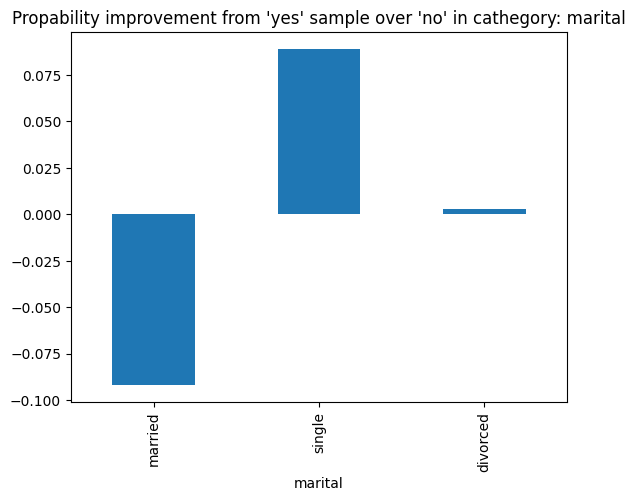

In [19]:
plot_cathegory(X,y,"marital")

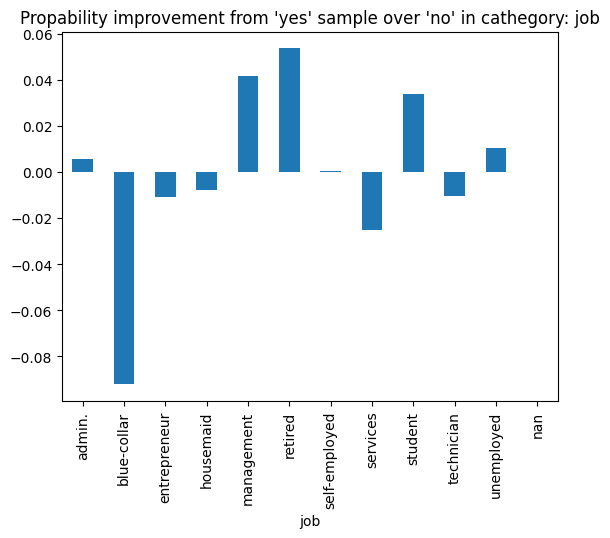

In [20]:
plot_cathegory(X,y,"job")


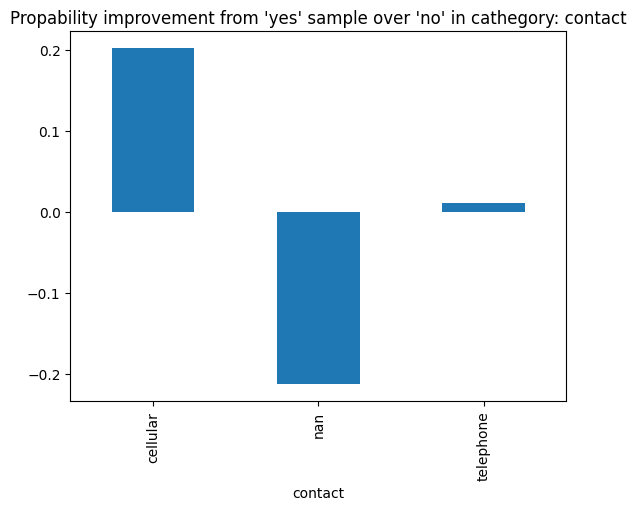

In [21]:
plot_cathegory(X,y,"contact")

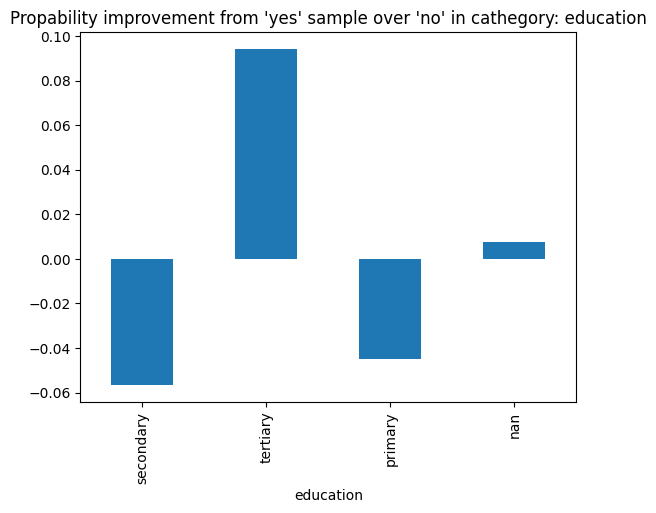

In [22]:
plot_cathegory(X,y,"education")

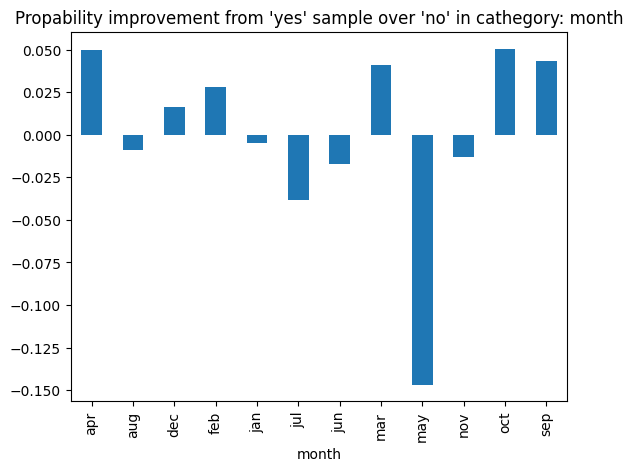

In [23]:
plot_cathegory(X,y,"month")

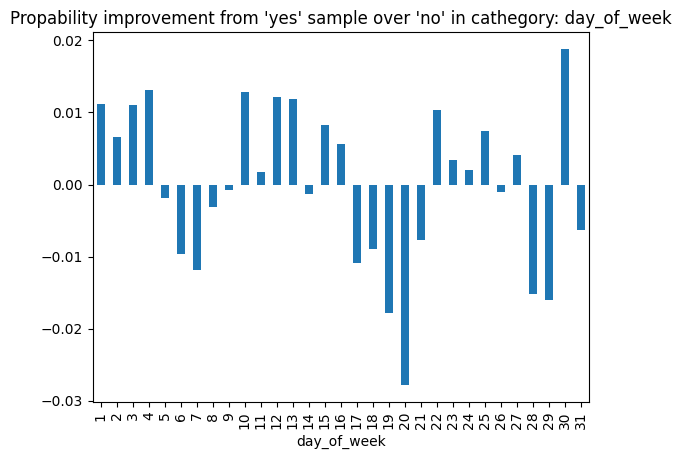

In [24]:
plot_cathegory(X,y,"day_of_week")

## Modellaufbau

### Umgang mit fehlenden Werten

- Für **kategoriale Variablen mit fehlenden Werten (NaNs)** wurde eine neue Kategorie **"unknown"** eingeführt.
- Für **numerische Variablen mit fehlenden Werten** wurden diese mit **-1** befüllt.  
  Dies ist hier vertretbar, da **baum-basierte Modelle** (z. B. Random Forest oder XGBoost) mit solchen Platzhaltern umgehen können.  
  Bei anderen Modelltypen (z. B. lineare Modelle) wäre dieses Vorgehen eher problematisch.
- **Binäre Variablen** enthalten **keine fehlenden Werte**.

### Verwendete Modelle

- **Baseline-Modell:** Jeder Kunde wird als positiver Abschluss vorhergesagt.  
  → Dient als Referenz zur Bewertung der Modellleistung.

- **Random Forest (RF):** Ein baumbasiertes Ensemble-Verfahren, robust gegenüber Ausreißern und fehlenden Werten.

- **XGBoost (Extreme Gradient Boosting):** Ein leistungsfähiges Gradient-Boosting-Verfahren, das sich ebenfalls gut für strukturierte Daten eignet.

Diese Modelle wurden gewählt, da sie sich **schnell und unkompliziert für Prototyping** einsetzen lassen und **gute Ergebnisse bei tabellarischen Daten liefern**.


In [25]:
numerical = ["age", "balance", "pdays", "campaign"]
x_features = X.drop(["duration"], axis=1)
for col in cathegorical_variables + ["day_of_week", "month"]:
    x_features[col] = pd.factorize(x_features[col].fillna("unknown"))[0]
x_features[binary_columns] = x_features[binary_columns].eq('yes')
x_features[numerical] = x_features[numerical].fillna(-1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y["y"].eq('yes'), test_size = 0.25, random_state=43)

rf = RandomForestClassifier(random_state=43, min_samples_leaf=3, min_samples_split=5)
rf.fit( X_train, y_train)
y_had_rf = rf.predict(X_test)
y_had_train = rf.predict(X_train)
f1_rf = f1_score(y_test, y_had_rf)

In [27]:
print("Train", "PR/Recall")
precision_score(y_train, y_had_train), recall_score(y_train, y_had_train)

Train PR/Recall


(0.9527112232030265, 0.3817584638706417)

In [28]:
print("Test", "PR/Recall")
print(precision_score(y_test, y_had_rf), recall_score(y_test, y_had_rf))
confusion_matrix(y_test, y_had_rf)

Test PR/Recall
0.6296296296296297 0.19158527422990232


array([[9822,  150],
       [1076,  255]])

In [29]:

xgb = XGBClassifier(random_state=43, n_estimators= 500, learning_rate = 0.025)
xgb.fit( X_train, y_train)
y_had = xgb.predict(X_test)
y_had_prob = xgb.predict_proba(X_test)
y_had_prob = [y[1] for y in y_had_prob]
y_had_train = xgb.predict(X_train)
print("Test XGB", "PR/Recall")
print(precision_score(y_test, y_had), recall_score(y_test, y_had))
f1_xgb = f1_score(y_test, y_had)

Test XGB PR/Recall
0.6012145748987854 0.2231404958677686


In [30]:
baseline_had = np.ones(y_test.shape)
f1_baseline = f1_score(y_test, baseline_had)
print("Test XGB", "PR/Recall")
print(precision_score(y_test, baseline_had), recall_score(y_test, baseline_had))

Test XGB PR/Recall
0.1177563478722463 1.0


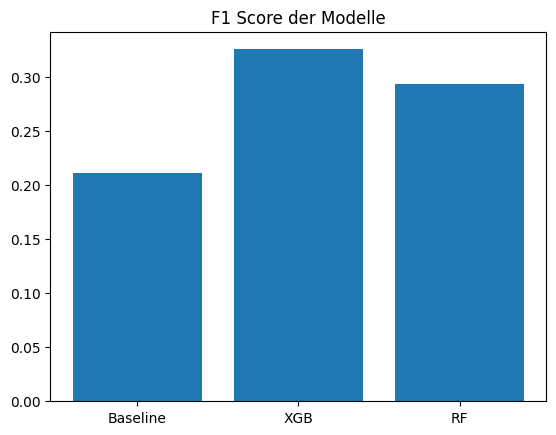

In [31]:
plt.title("F1 Score der Modelle")
plt.bar([1,2,3], [f1_baseline, f1_xgb, f1_rf])
plt.xticks([1,2,3], labels=["Baseline","XGB", "RF"]);

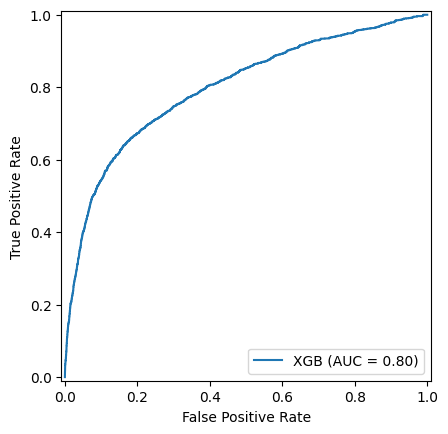

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_had_prob)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGB')
display.plot()
plt.show()

## Zusammenfassung

- Die Modelle zeigen auf den **Testdaten einen schlechten Recall**.
- Selbst auf den **Trainingsdaten** ist der Recall eher gering, es sei denn, das Modell wird explizit **overfitted**.
- Insgesamt scheint **keine der Variablen ein besonders starker Prädiktor** für den Abschluss zu sein.

Basierend auf den Ergebnissen würde ich **XGBoost (XGB)** bevorzugen, da es einen höheren Recall aufweist und der **F1-Score insgesamt höher** ist.  
Jedoch sollte ein **weiterer Vergleich mit den Kosten und der ROC-Kurve** erfolgen. Dies würde helfen, die **Entscheidungsgrenze** (aktuell bei 0,5) zu verschieben und damit mehr positive Fälle zu erkennen.

## Offene To-Dos:
- **Fehleranalyse** durchführen: Wenn mehr Zeit zur Verfügung steht, sollte analysiert werden, **wo das Modell die meisten Fehler macht** und wie diese vermieden werden können.
- **API für Prognosen** erstellen, um die Vorhersagen in Echtzeit anzuwenden.
- **Feature-Gewichtungen abgleichen** (z. B. bei Random Forest), um mehr über die Zusammenhänge zwischen den Variablen und dem Ziel zu erfahren.

## Fragen:

**Würden Sie für die Voraussage noch weitere Datenpunkte in Erwägung ziehen?**
- Falls vorhanden, könnte der **Gehaltseingang** der Kunden ein nützlicher Prädiktor sein.
- Auch die **Häufigkeit der Nutzung** von Bankdienstleistungen könnte als zusätzlicher Faktor dienen.
- Weitere **genutzte Produkte** und **Anzahl der Transaktionen/Ausgaben** könnten ebenfalls relevant sein.

**Können die Erkenntnisse Ihrer Analyse auch für andere Bereiche der Bank verwendet werden?**
- Mit einem ähnlichen Ansatz könnte auch vorhergesagt werden, welches **Produkt** am besten zu den Kunden passt.  
  Dies könnte durch ein **Ranking-Verfahren** oder eine **Multi-Class Klassifikation** erfolgen.
- Wenn mehr Informationen über die verschiedenen Produkte vorliegen, könnte das Problem auch zu einem **Empfehlungssystem** umgebaut werden, um passende Produkte vorzuschlagen.

